# Explore here

Predicting Diabetes
This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.
In this dataset, you will find the following variables:

Pregnancies. Number of pregnancies of the patient (numeric)

Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)

BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)

SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)

Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)

BMI. Body mass index (numeric)

DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)

Age. Age of patient (numeric)

Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

Vemos las dimesiones del data set 

In [3]:
data_raw.shape

(768, 9)

Vemos un panorama de los datos sacando las primeras filas

In [4]:
data_raw.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Desde el inicio tenemos las unidades de nuestrar caracteristicas, por lo que estamos certeros de como se han medido estos valores, en este momento solo es importante mencionar que para un resultado positivo tendremos outcome igual a 1 y negativo == 0 

Observamos la informacion general del data set

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Podemos observar que tenemos un total de 767 filas utiles, 9 variables numericas por lo que haremos un describe para ver el panorama estadistico del data set. Tambien en este punto podemos ver que no tenemos valores nulos por lo que podemos saltarnos ese paso mas adelante.

In [6]:
data_raw.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Analizando las medias estadisticas de nuestro data set podemos observar de inicio que un BMI medio mayor a 30 indica que estamos tratando con una poblacion que en promedio sufure de obesidad y de edad promedio de 33 anios, inmediatamente podemos ver un outlier en pregnancies ya que 17 no es un numero comun para una persona, lo cual nos puede indicar un error o simplemente una persona que esta muy fuera de la media pero que sea un dato real, lo analizaremos mas a profundidad en el analisis de outliers.

Desde el inicio podemos ver que sera necesario un analisis de outliers debido a que tenemos valores minimos de cero en variables en las que no tiene ningun sentido como glucosa, presion de sangre, grosor de piel, insulina y bmi

In [7]:
data_raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Analizando las variables sabemos que:

Glucose - el valor considerado normal es cualquiera menor a 140 mg/dL (NO TENEMOS LAS UNIDADES POR LO QUE ASUMIMOS, SON LAS MISMAS)

Blood pressure - Se considera que un numero menor a 90 mm/HG de presion diastolica es normal para adultos

grosor de piel - varia dependientemente de la edad y el sexo de la persona

insulina - los niveles normales estan en el rango de 5 a 12 mu U/ml

BMI - Indicador de obesidad y grasa corporal 

Diabetes pedigree function - Es una funcion que nos da un numero en la probabilidad de que una persona padezca de diabetes basandose en su historial familiar.

edad - edad 

Outcome - == 1 positivo / == 0 negativo







In [8]:
data_starter = data_raw.rename(columns={'Pregnancies':'embarazos', 'Glucose':'glucosa', 'BloodPressure':'presion_sangre', 'SkinThickness':'grosor_piel', 'Insulin':'insulina_nivel', 'DiabetesPedigreeFunction':'DPF', 'Age':'edad', 'Outcome':'diagnositco'}).copy()

In [9]:
data_starter.head(2)

embarazos  glucosa  presion_sangre  grosor_piel  insulina_nivel   BMI  \
0          6      148              72           35               0  33.6   
1          1       85              66           29               0  26.6   

     DPF  edad  diagnositco  
0  0.627    50            1  
1  0.351    31            0

Procederemos a hacer el analisis univariado de cada caracteristica, en este caso solo tenemos numericas por lo que solo usaremos histogramas para ver su distribucion en este punto

In [10]:
def hist_plot_num (df):
    caracteristicas_numericas = df.select_dtypes(include=np.number).columns
    for col in caracteristicas_numericas:
        plt.figure(figsize=(15, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribución de {col}')
        plt.show()


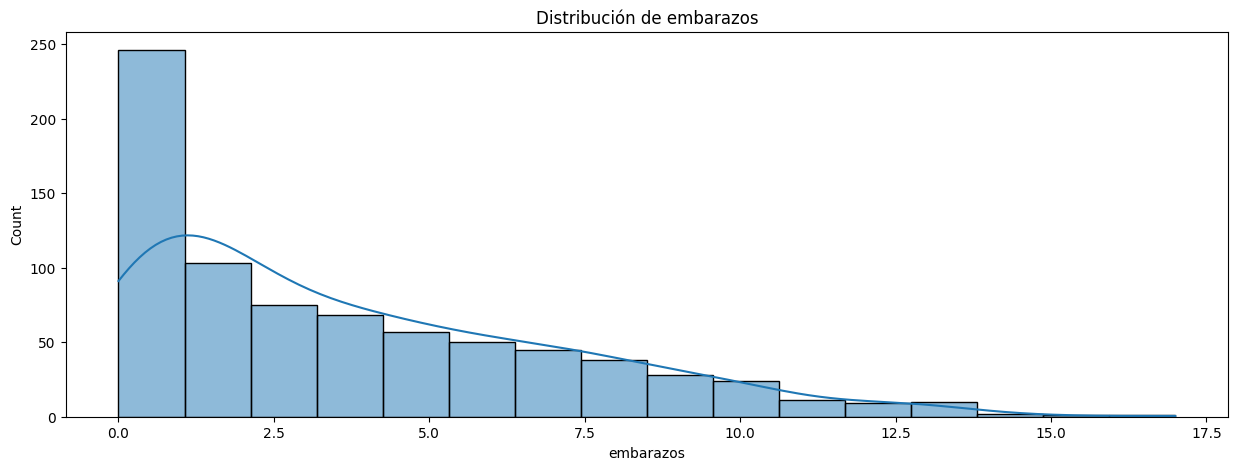

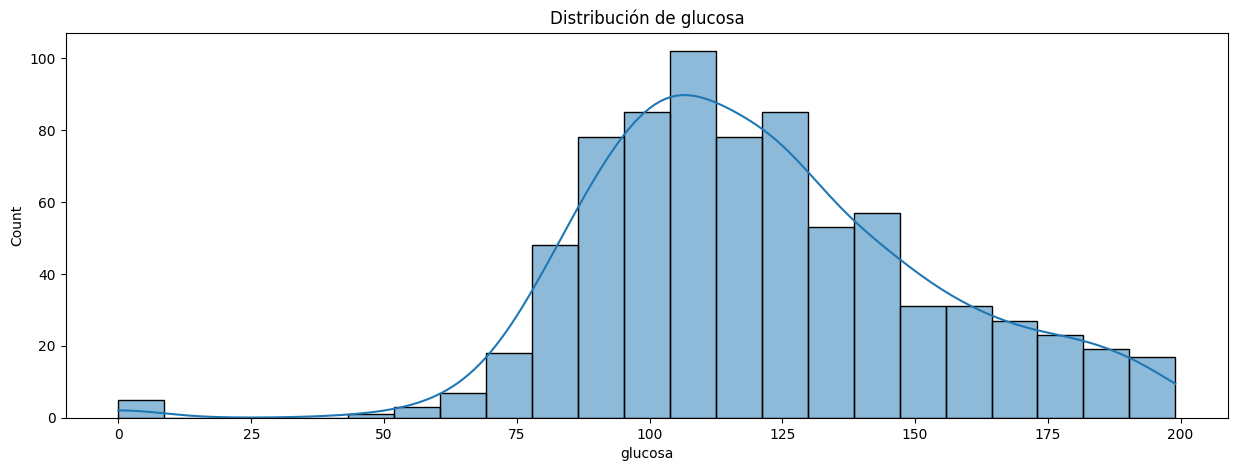

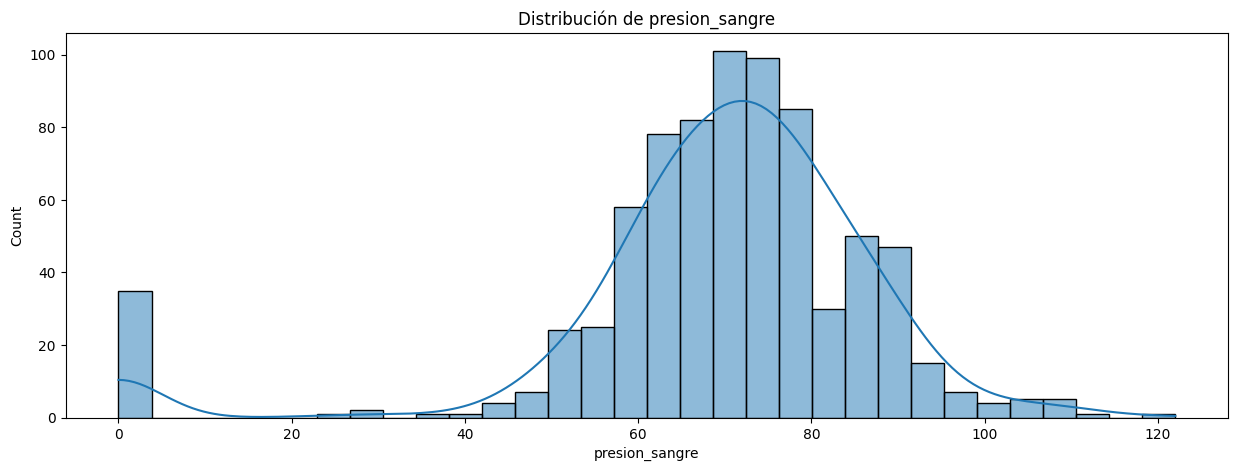

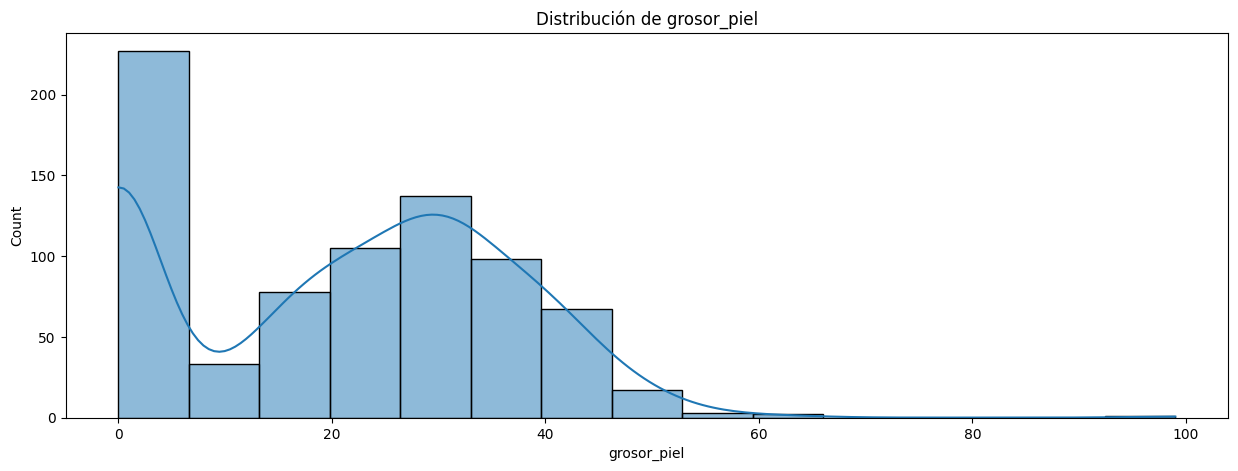

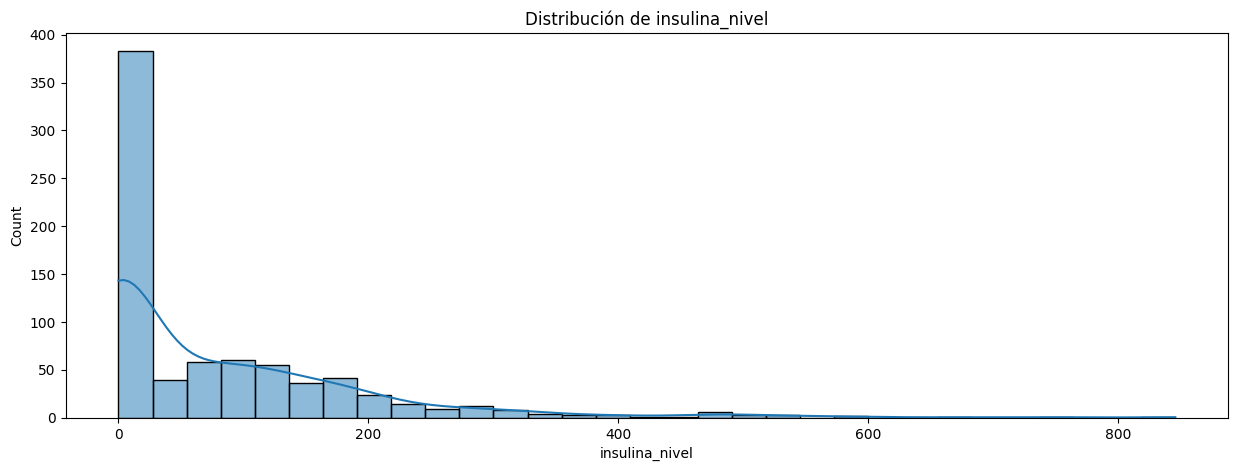

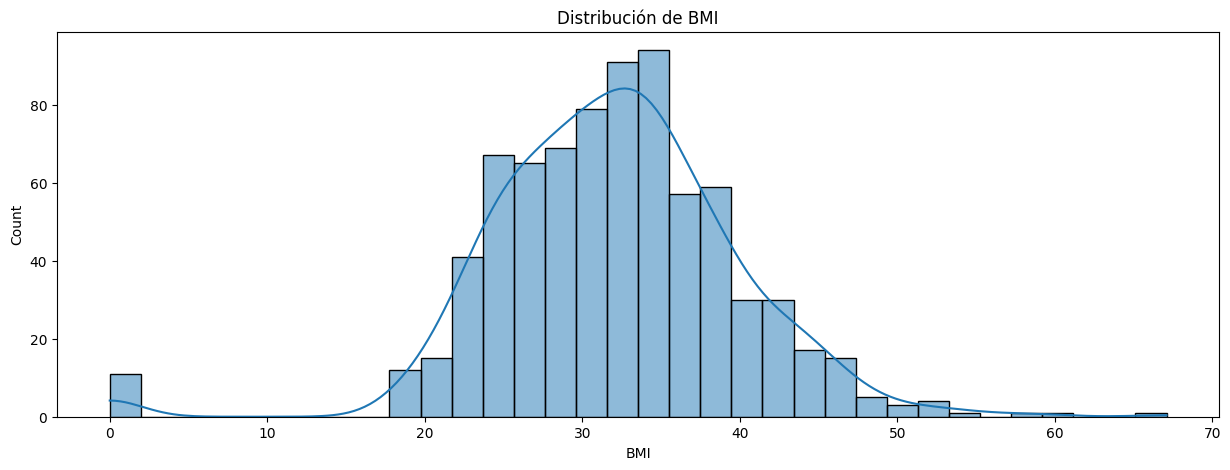

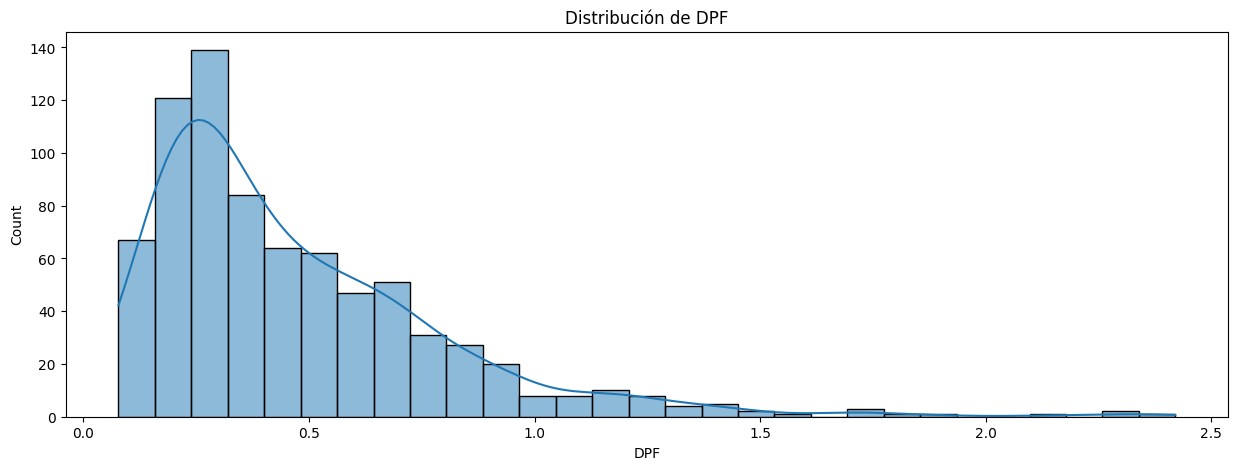

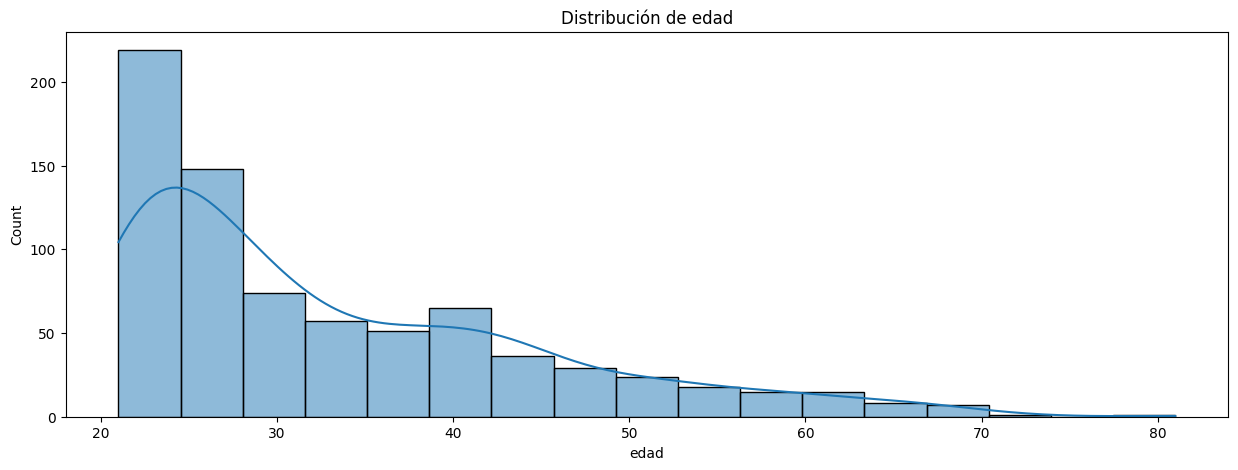

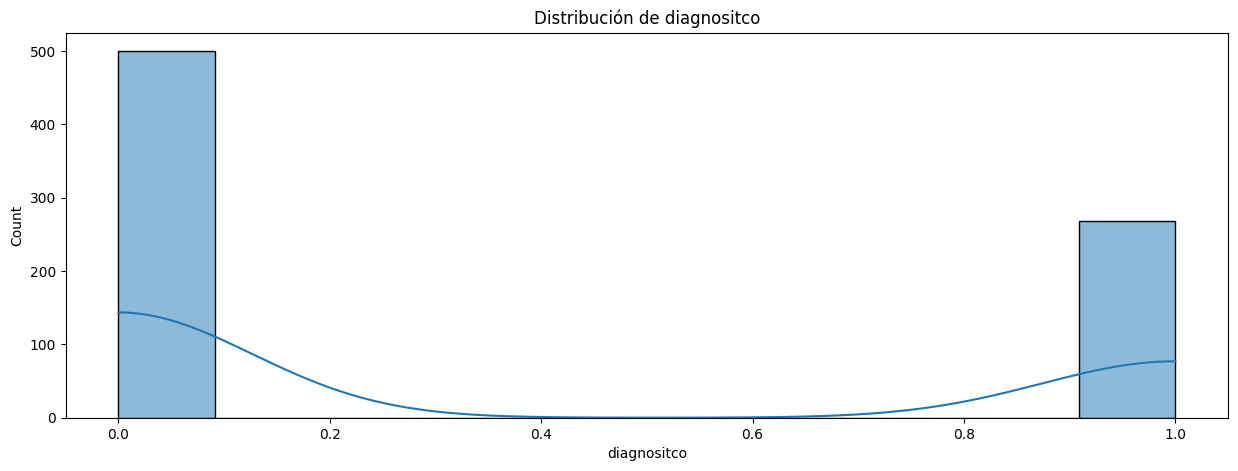

In [11]:
hist_plot_num(data_starter)

Podemos detectar los outliers inmediatamente, mas adelante haremos el analisis para determinar si se eliminan filas o se elimina toda la columna, de igual forma es posible que sea mas conveniete rellenar estos valores que estan en cero y tomarlo como un error en la caputura de datos. 

Continuaremos haciendo el analisis de pares entre variables, incluyendo la relacion que tiene cada una con neustra variable objetivo

Hacemos un pair plot para ver el panorama de las relaciones entre variables

<Figure size 1200x1000 with 0 Axes>

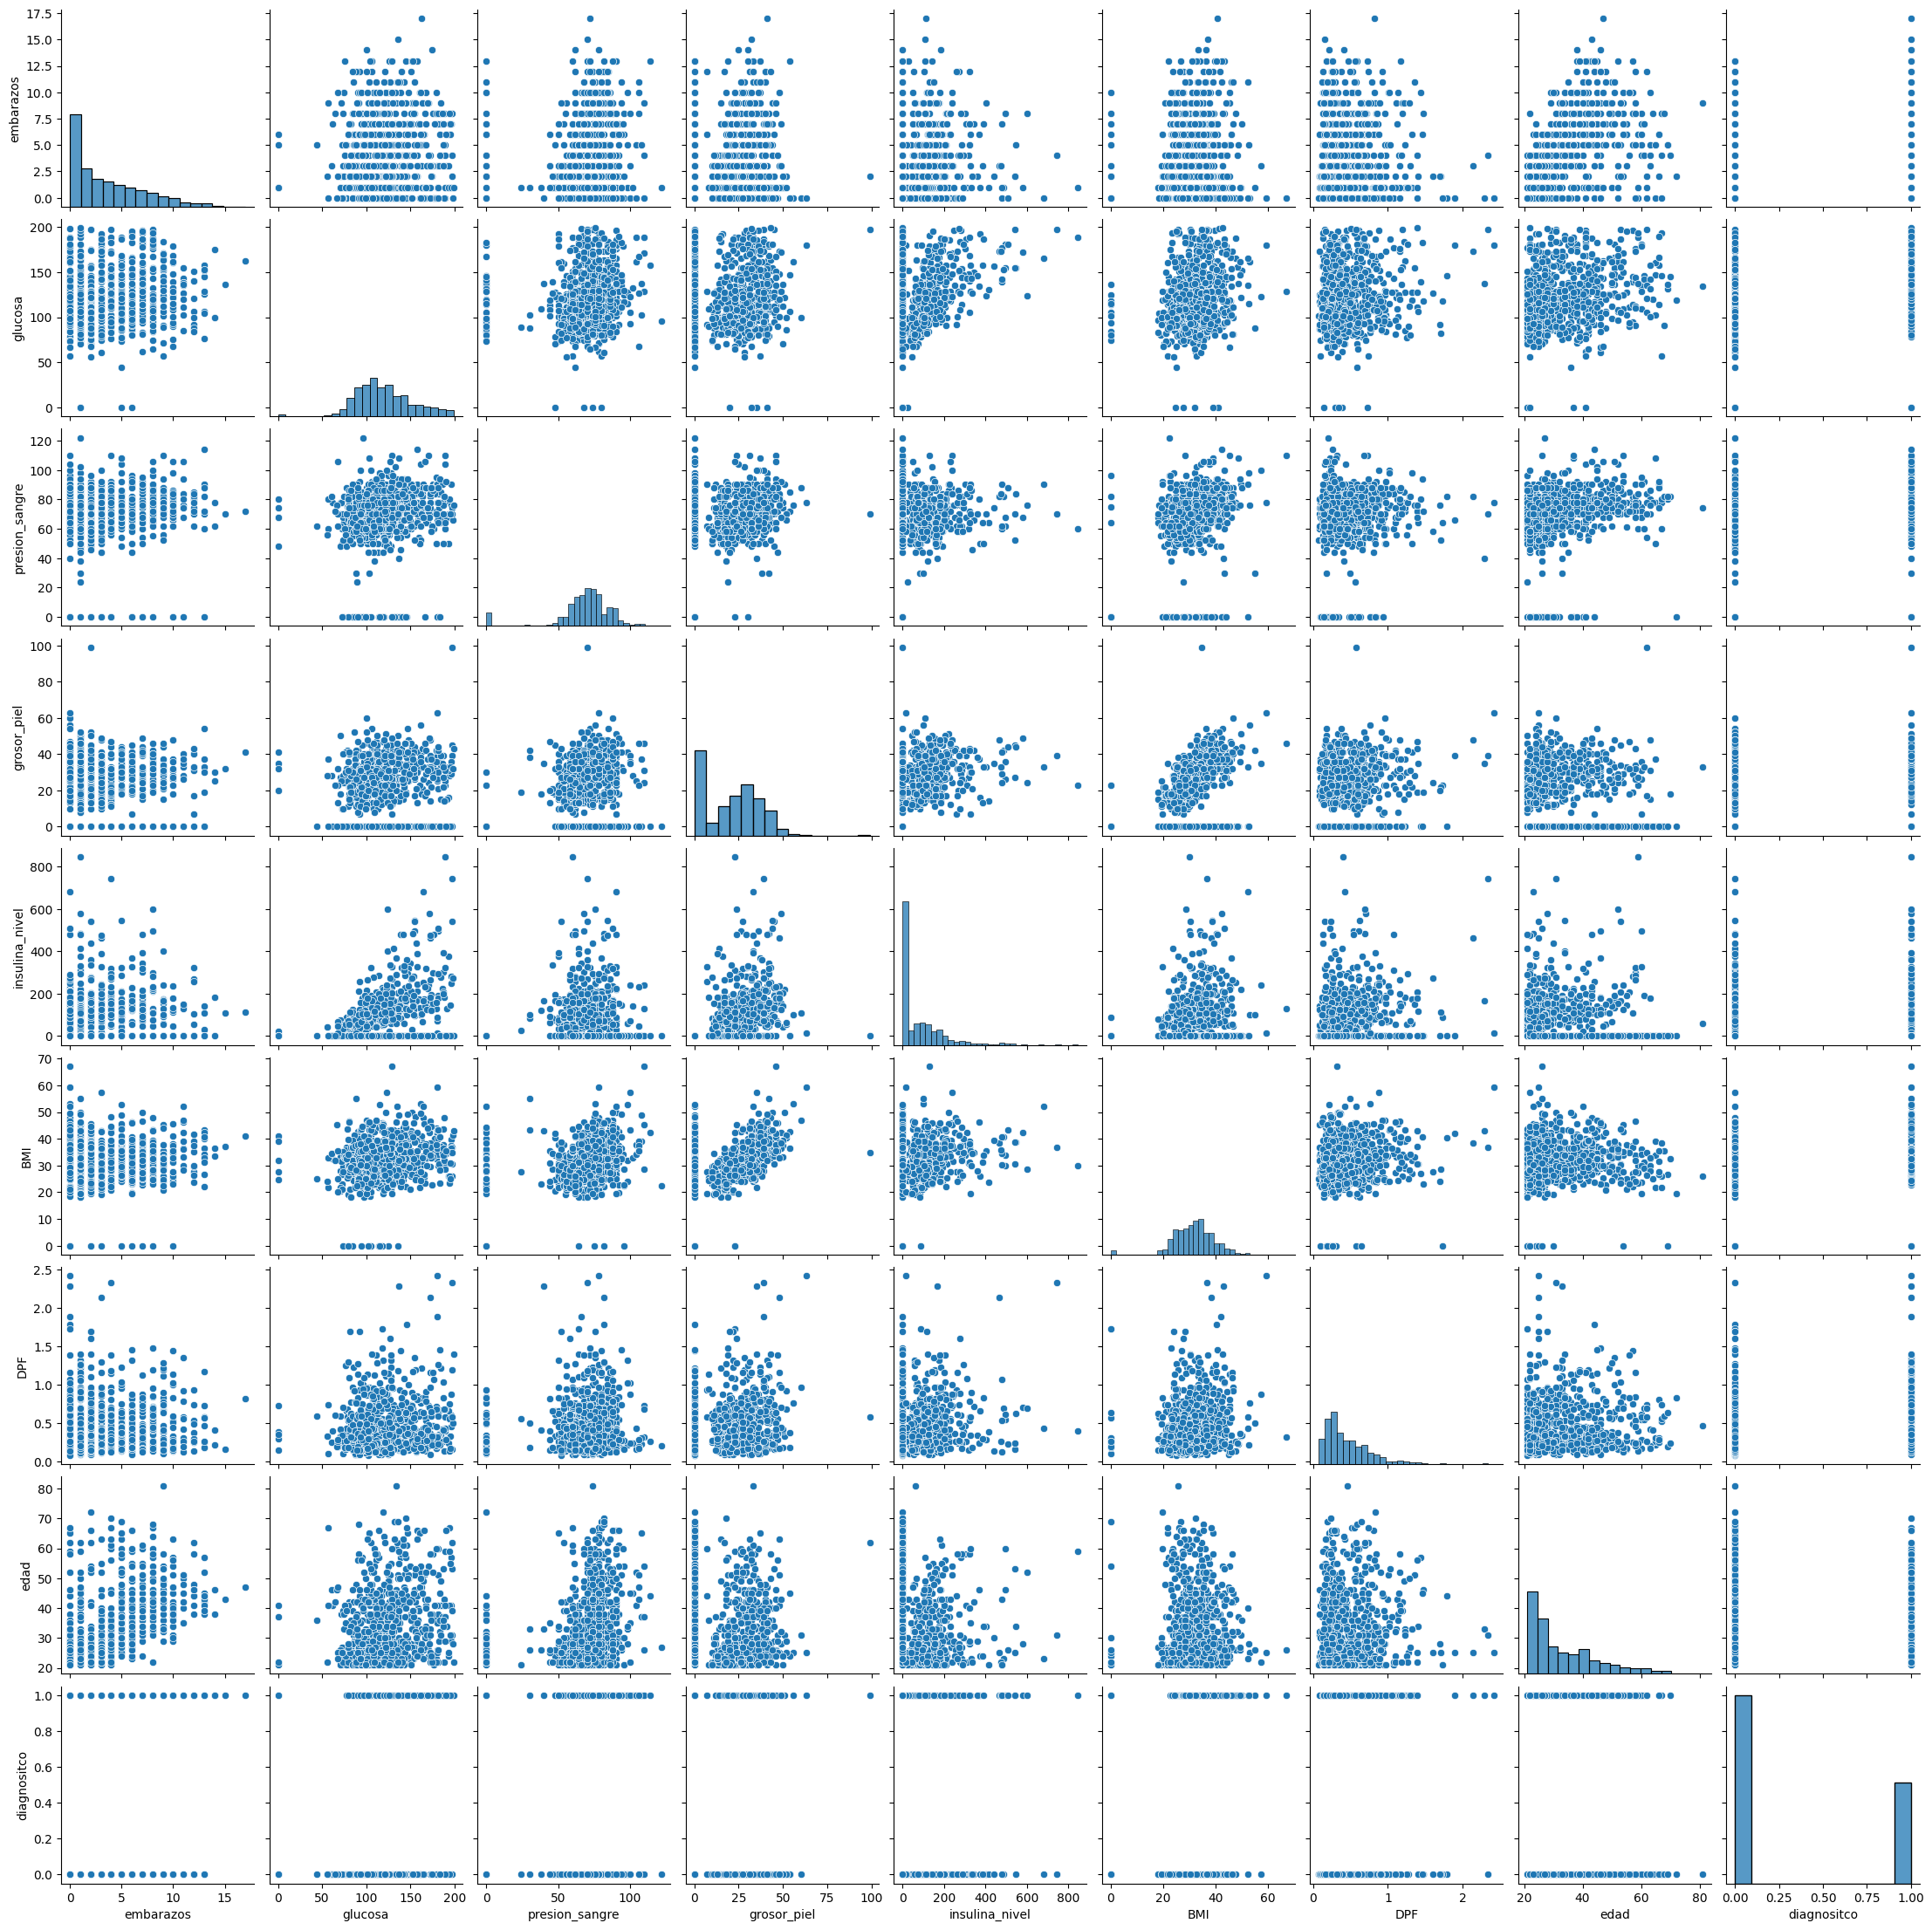

In [12]:
plt.figure(figsize=(12, 10))
sns.pairplot(data_starter.select_dtypes(include=np.number))
plt.show()


Podemos observar de forma marcada:

Relacion entre el BMI y el grosor de piel

relacion entre el diagnostico y valores mas altos de glucosa

continuamos analizando la correlacion entre variables numericas

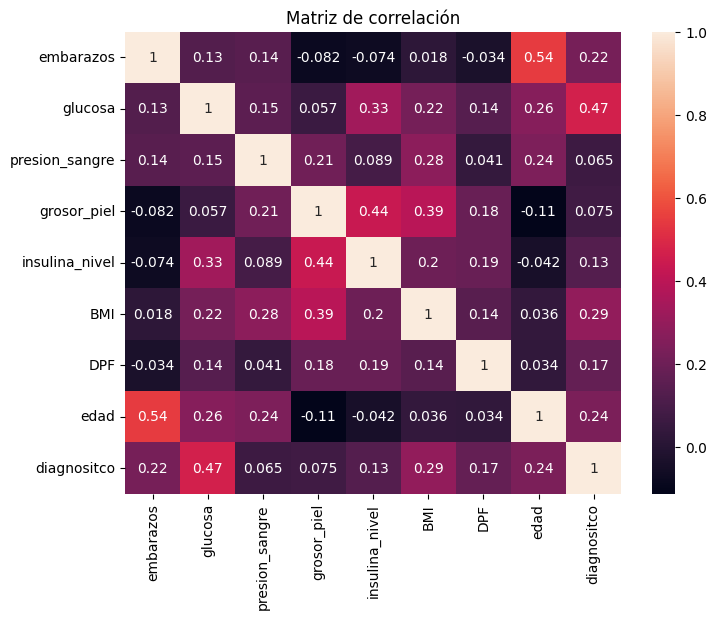

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_starter.corr(), annot=True, cmap='rocket')
plt.title('Matriz de correlación')
plt.show()


Una vez que tenemos este mapa de correlacion ya podemos ver la relacion entre variables:

La variable mas determinante para el diagnostico es la glucosa, seguido de BMI, edad, embarazos y DPF
El bmi esta levemente correlacionado con la glucosa, la presion de sangre y el grosor de piel.
Vemos una relacion significante entre el nivel de insulina y el grosor de piel 


Ya sabemos que el data set no tiene valores nulos, pero si outliers en cero, por lo que confirmaremos si se tienen valores nulo y despues haremos el analisis de los datos incoherentes == 0 

In [14]:
data_starter.isnull().sum().sum()

0

In [15]:
for i in data_starter:
    series = data_starter[f'{i}']==0
    tots = series.sum()
    print(f'El numero de ceros en la columna {i} es igual a {tots}')

El numero de ceros en la columna embarazos es igual a 111
El numero de ceros en la columna glucosa es igual a 5
El numero de ceros en la columna presion_sangre es igual a 35
El numero de ceros en la columna grosor_piel es igual a 227
El numero de ceros en la columna insulina_nivel es igual a 374
El numero de ceros en la columna BMI es igual a 11
El numero de ceros en la columna DPF es igual a 0
El numero de ceros en la columna edad es igual a 0
El numero de ceros en la columna diagnositco es igual a 500


Viendo la cantidad total de ceros en cada columna podemos observar que es necesario imputar, por que no podemos perder dos columnas enteras o una cantida de filas que equivale a un alto porcentaje del total, aproximadamente el 50% ya que en nivel de insulina tenemos una correlacion de .13 con el resultado. 

Aunado a esto, vamos a crear un data frame en el que eliminamos tanto nivel de insulina como grosor de piel para comparar el ajuste del modelo mas adelante 

In [16]:
data_w_o_insulina_grosor = data_starter[['embarazos', 'glucosa', 'presion_sangre', 'BMI', 'DPF', 'edad', 'diagnositco']].copy()

Continuando con el analisis reemplazaremos los ceros en las columnas que corresponde por valores nulos para hacer el analisis

In [17]:
data_filled = data_starter.copy()

In [18]:
columnas_cero = ['glucosa', 'presion_sangre', 'grosor_piel', 'insulina_nivel', 'BMI']
data_filled[columnas_cero] = data_filled[columnas_cero].replace(0, np.nan)

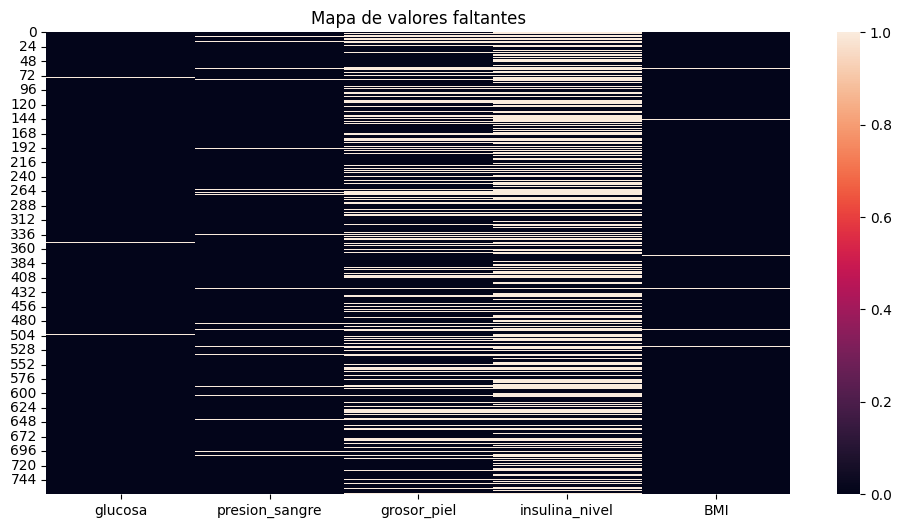

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_filled[['glucosa', 'presion_sangre', 'grosor_piel', 'insulina_nivel', 'BMI']].isnull(), cbar=True, cmap='rocket')
plt.title('Mapa de valores faltantes')
plt.show()

In [20]:
missing = data_filled.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:\n", missing[missing > 0])

Porcentaje de valores faltantes por columna:
 glucosa            0.651042
presion_sangre     4.557292
grosor_piel       29.557292
insulina_nivel    48.697917
BMI                1.432292
dtype: float64


Aqui vemos de forma mas evidente que el unico tratamiento para las do columnas con mayor cantidad de datos iguales a cero debe ser imputar o eliminar la columna para no perder nuestro data set

Se decidio utilizar el metodo KNN para imputar los valores debido a que imputar con la media, si bien es un metodo que nos daria datos para proseguir, es posible que cause un bias en el modelo por la gran cantidad de datos faltantes en dos de las columnas

In [21]:
from sklearn.impute import KNNImputer

imputador = KNNImputer(n_neighbors=5)

data_filled_imputed = imputador.fit_transform(data_filled)

data_filled_imputed = pd.DataFrame(data_filled_imputed, columns=data_filled.columns)

data_filled_imputed.describe()

embarazos     glucosa  presion_sangre  grosor_piel  insulina_nivel  \
count  768.000000  768.000000      768.000000   768.000000      768.000000   
mean     3.845052  121.598177       72.371354    29.114583      153.180208   
std      3.369578   30.496543       12.206417     9.424100       98.385308   
min      0.000000   44.000000       24.000000     7.000000       14.000000   
25%      1.000000   99.000000       64.000000    23.000000       87.900000   
50%      3.000000  117.000000       72.000000    29.000000      133.700000   
75%      6.000000  140.250000       80.000000    35.000000      190.150000   
max     17.000000  199.000000      122.000000    99.000000      846.000000   

              BMI         DPF        edad  diagnositco  
count  768.000000  768.000000  768.000000   768.000000  
mean    32.427344    0.471876   33.240885     0.348958  
std      6.886588    0.331329   11.760232     0.476951  
min     18.200000    0.078000   21.000000     0.000000  
25%     27.500000    0.243750   24.000000     0.000000  
50%     32.090000    0.372500   29.000000     0.000000  
75%     36.600000    0.626250   41.000000     1.000000  
max     67.100000    2.420000   81.000000     1.000000

Una vez que imputamos los valores volvemos a hacer un heat map para ver que ha cambiado en nuestro data set

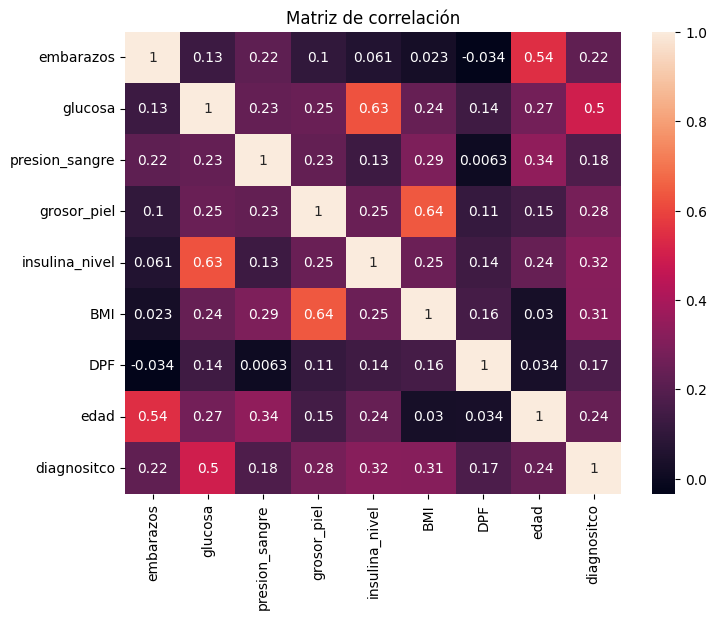

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_filled_imputed.corr(), annot=True, cmap='rocket')
plt.title('Matriz de correlación')
plt.show()


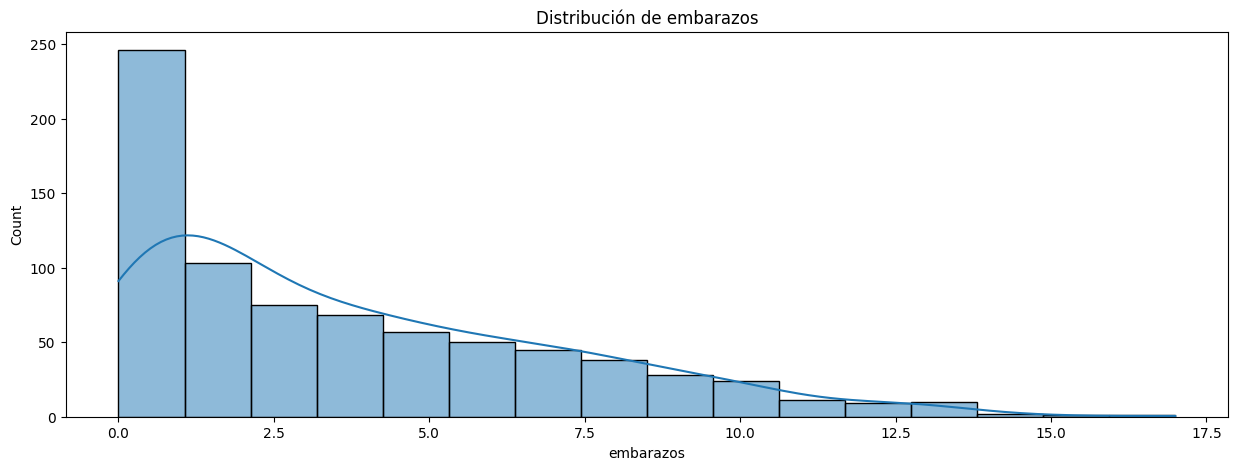

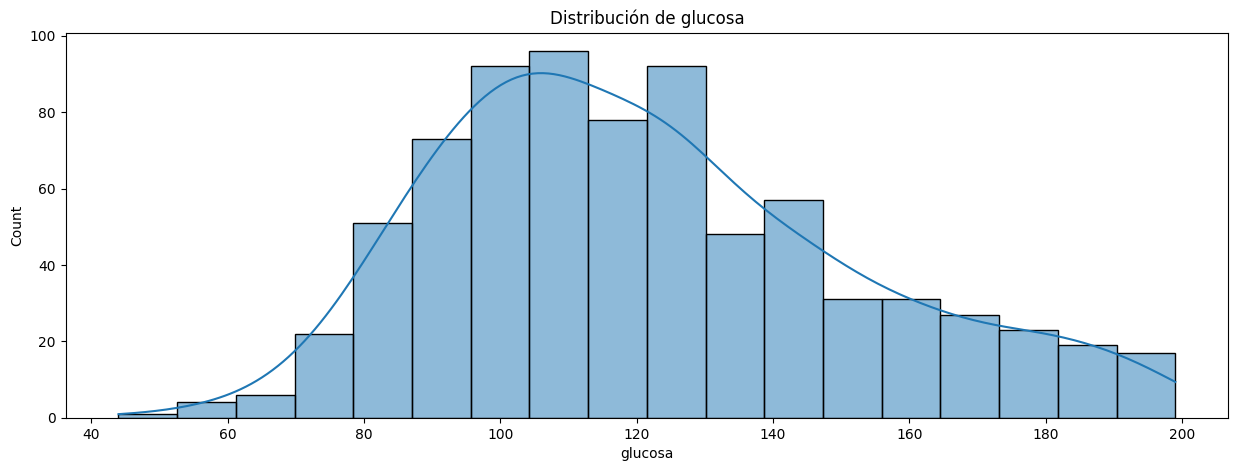

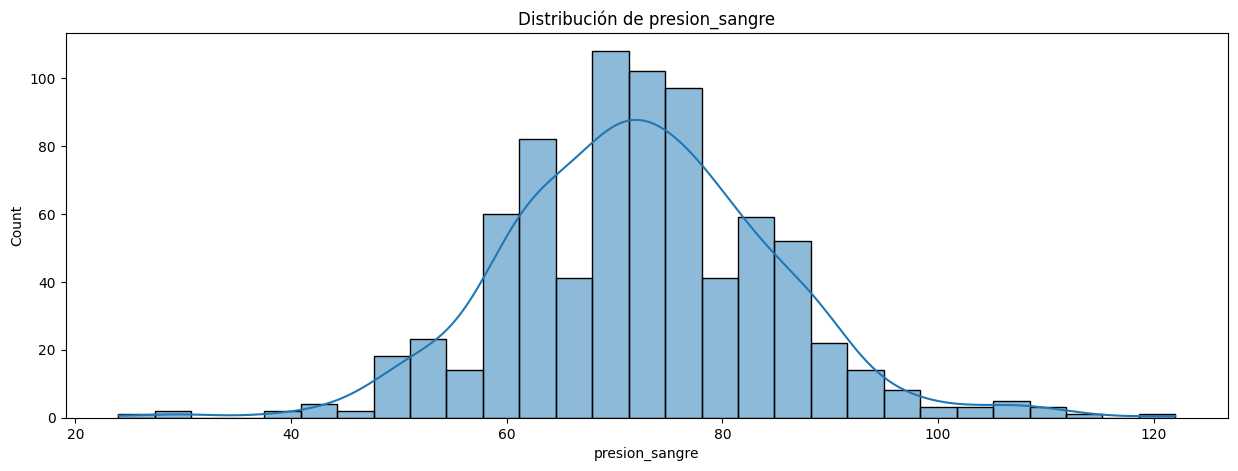

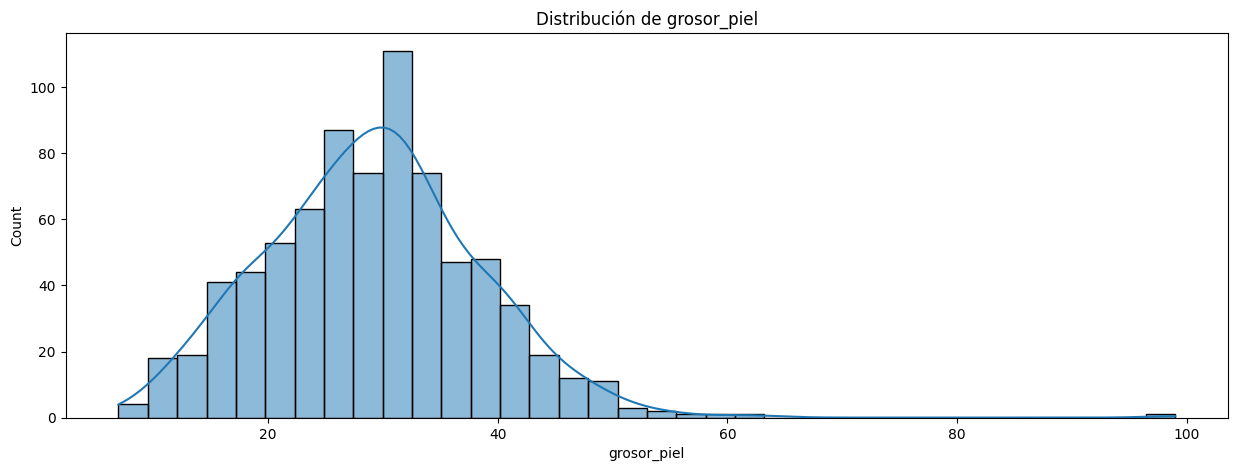

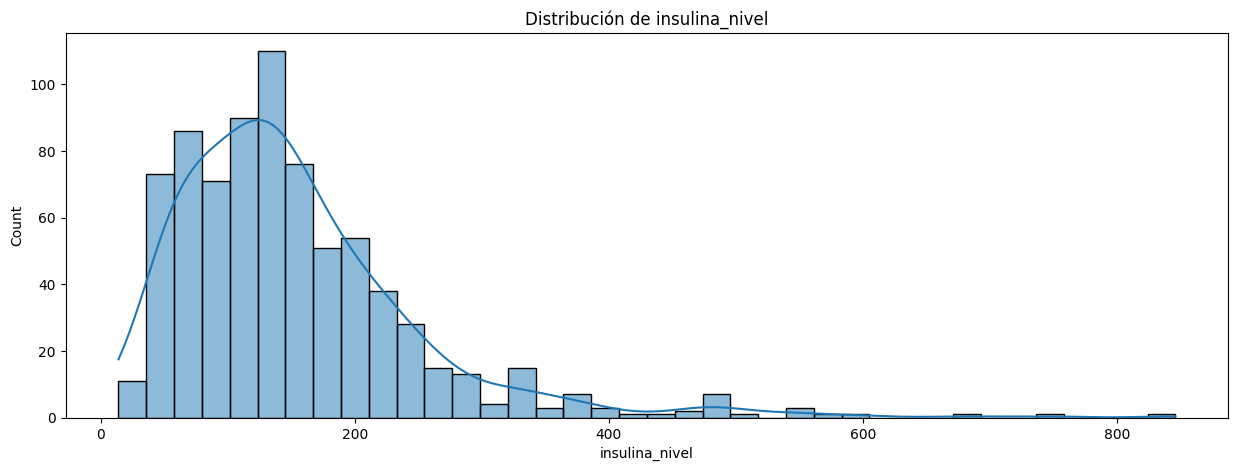

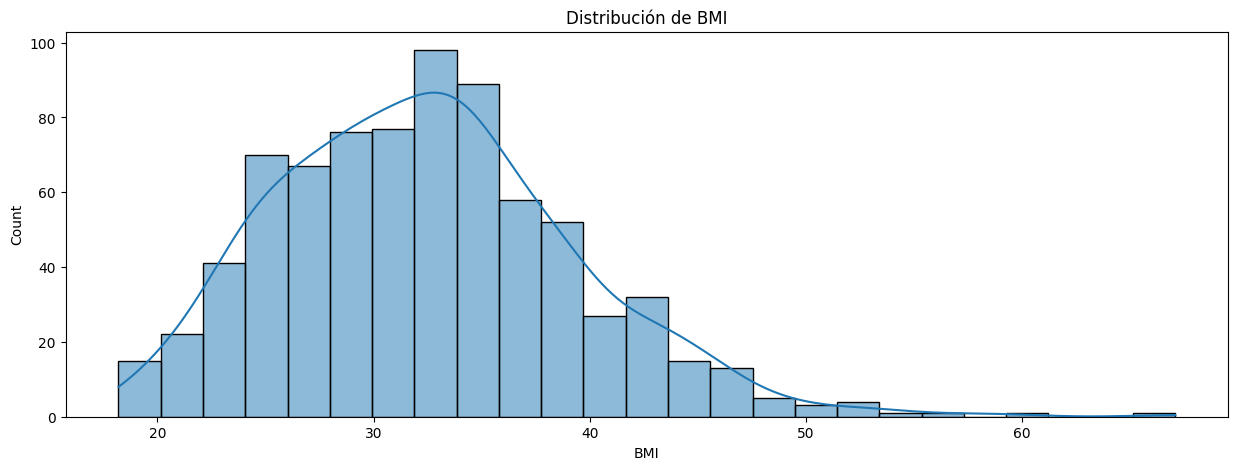

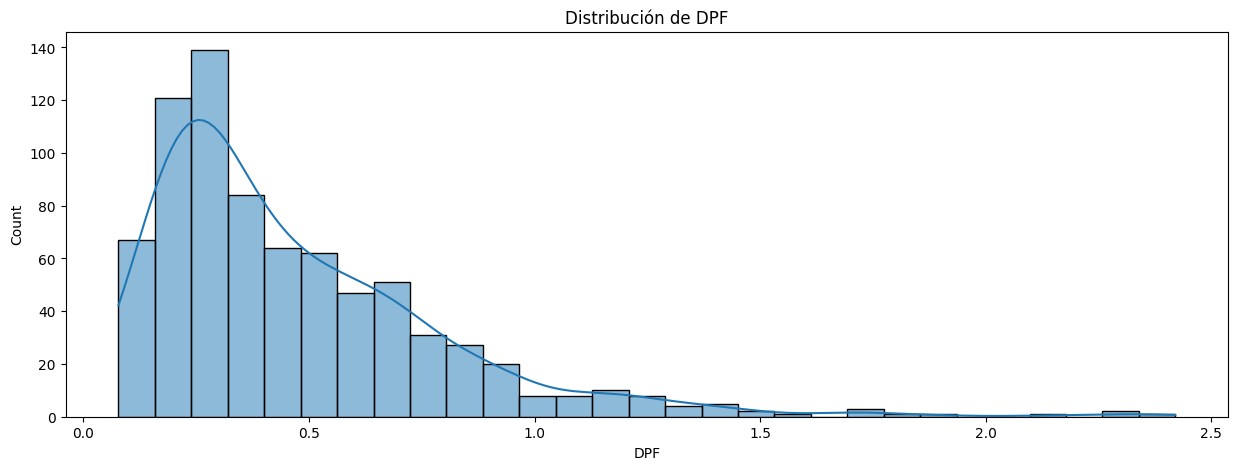

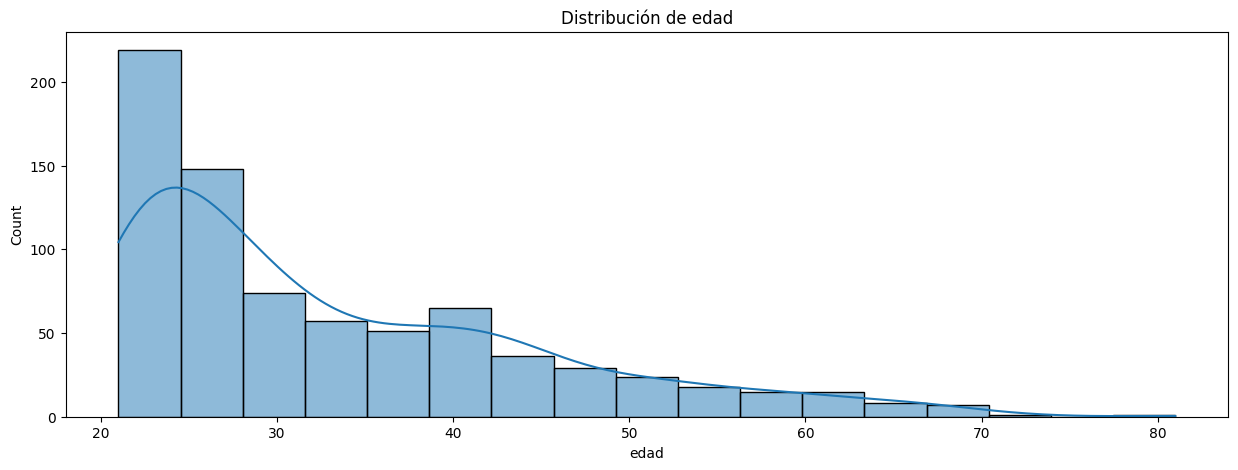

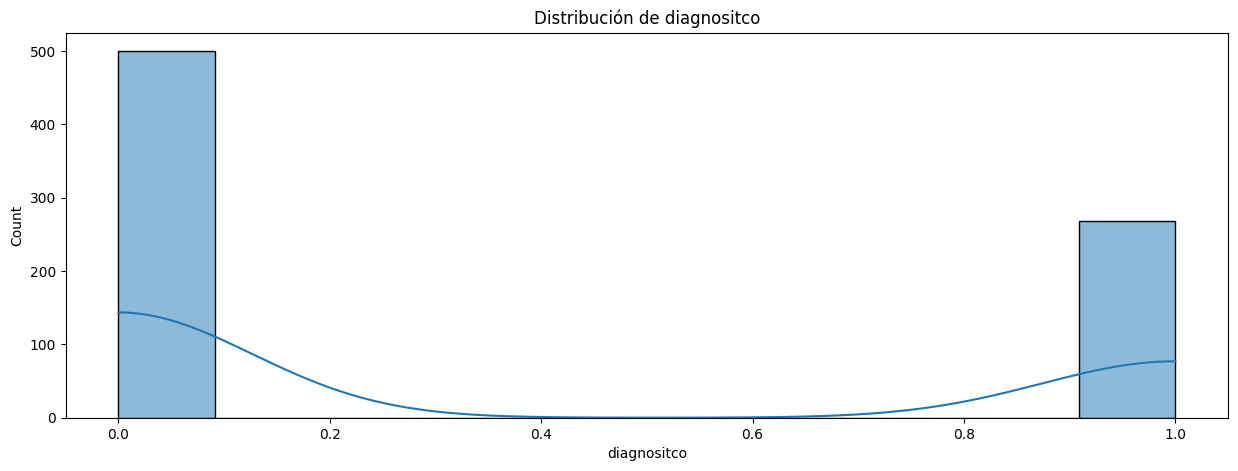

In [26]:
hist_plot_num(data_filled_imputed)

Observamos una mayor correlacion enttre la insulina y la glucosa lo cual tiene sentido desde un punto de vista medico, asi como un aumento en la correlacion del diagnostico con el nivel de insulina y grosor de piel, esto nos dice que en un caso practico es muy probable que estas dos variables sean altamente correlacionadas con el padecimiento. Tomamos como un exito la imputacion de los nulos y procedemos 

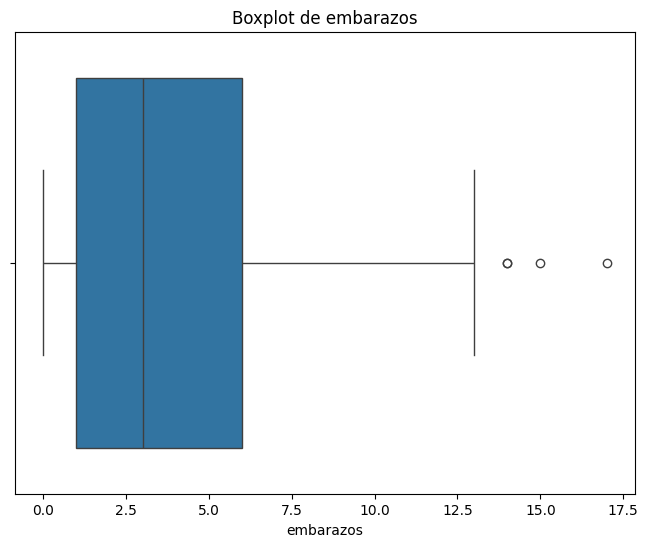

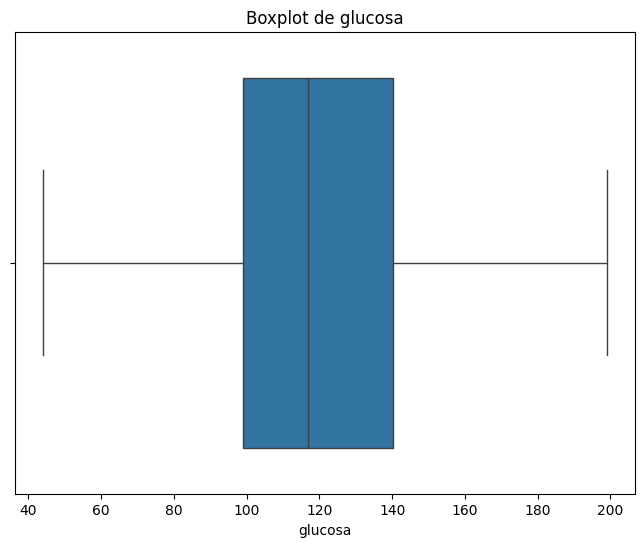

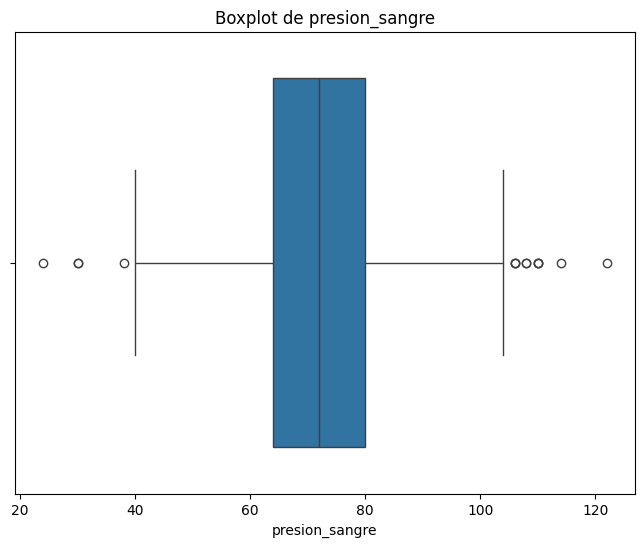

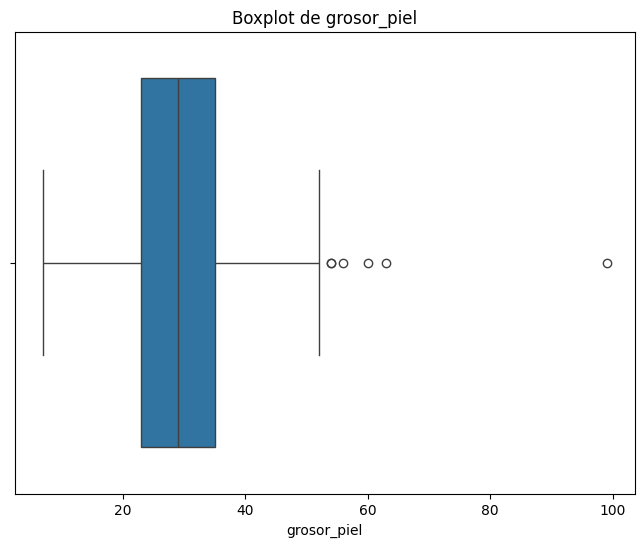

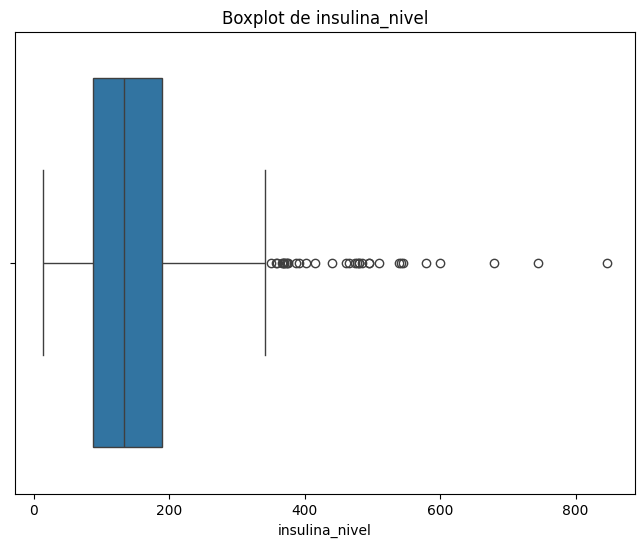

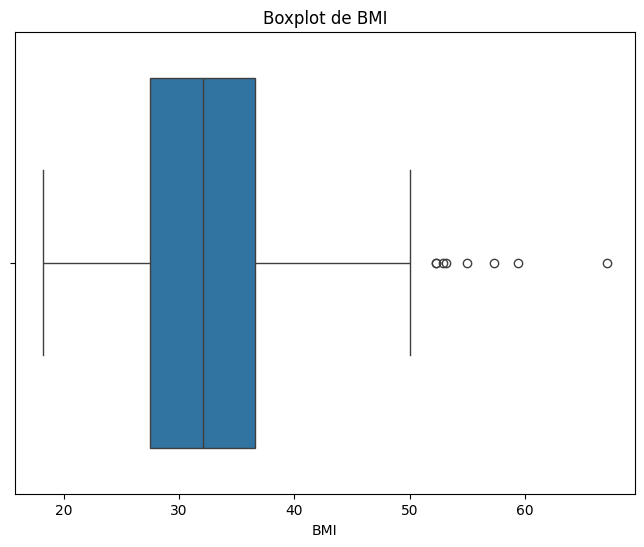

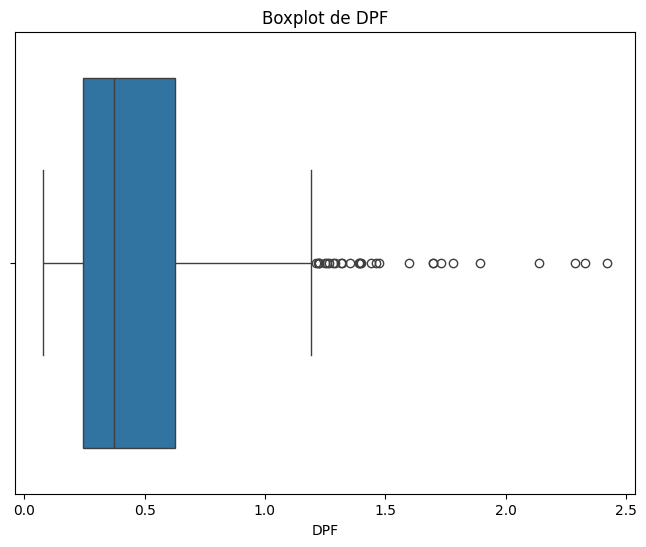

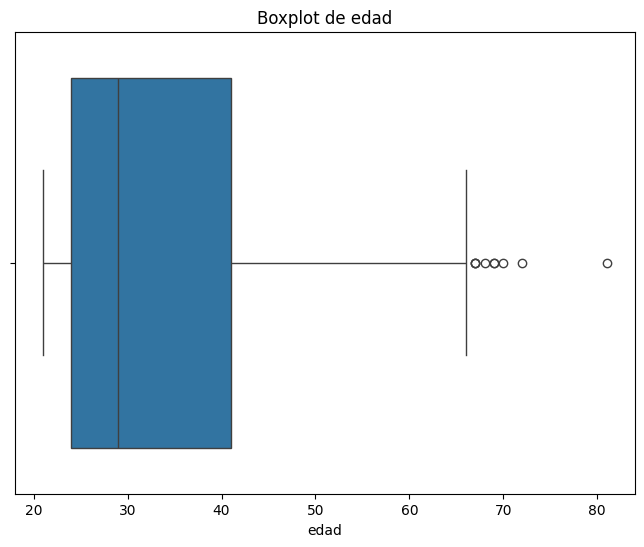

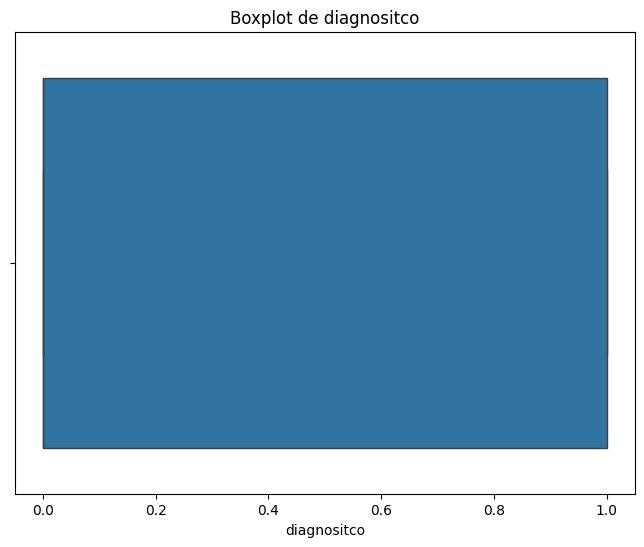

In [23]:
for col in data_filled_imputed.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_filled_imputed[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


sera necesario limpiar outliers de embarazos, presion de sangre y grosor de piel ya que llegamos a valores sin sentido o valores que son demasiado especificos para el entrenamiento de un modelo

Aqui tambien es importante mencionar que es probable que exista una cuestion con los valores de insulina y la magnitud con la que se miden ya que el rango para adultos es de 5 a 30 mu u/ml

In [24]:
def outlier_check (df):
    for col in df:
        Q1 = df[f'{col}'].quantile(.25)
        Q3 = df[f'{col}'].quantile(.75)
        IQR = Q3 - Q1
        outlier_max = df[df[f'{col}'] > Q3].value_counts().sum()
        outlier_min = df[df[f'{col}'] < Q1].value_counts().sum()
        outlier_num = outlier_min + outlier_max
        print(f'En la columna {col} tenemos \n limite minimo:\n {Q1} \n Limite maximo: \n {Q3} \n El total es: \n {outlier_num}')
        
        

In [25]:
outlier_check(data_filled_imputed)

En la columna embarazos tenemos 
 limite minimo:
 1.0 
 Limite maximo: 
 6.0 
 El total es: 
 280
En la columna glucosa tenemos 
 limite minimo:
 99.0 
 Limite maximo: 
 140.25 
 El total es: 
 370
En la columna presion_sangre tenemos 
 limite minimo:
 64.0 
 Limite maximo: 
 80.0 
 El total es: 
 337
En la columna grosor_piel tenemos 
 limite minimo:
 23.0 
 Limite maximo: 
 35.0 
 El total es: 
 368
En la columna insulina_nivel tenemos 
 limite minimo:
 87.9 
 Limite maximo: 
 190.15 
 El total es: 
 384
En la columna BMI tenemos 
 limite minimo:
 27.5 
 Limite maximo: 
 36.6 
 El total es: 
 378
En la columna DPF tenemos 
 limite minimo:
 0.24375 
 Limite maximo: 
 0.62625 
 El total es: 
 384
En la columna edad tenemos 
 limite minimo:
 24.0 
 Limite maximo: 
 41.0 
 El total es: 
 345
En la columna diagnositco tenemos 
 limite minimo:
 0.0 
 Limite maximo: 
 1.0 
 El total es: 
 0


De nuevo la cantidad de datos perdida seria realmente considerable si elminamos todos los outliers que no entran en nuestro rango intercuartil, por lo que tomaremos otro enfoque, donde utilizaremos los bigotes de nuestros box plots para la deteccion y solo eliminaremos los outliers de algunos.

In [27]:
def outlier_bigotes_check (df):
    for col in df:
        Q1 = df[f'{col}'].quantile(.25)
        Q3 = df[f'{col}'].quantile(.75)
        IQR = Q3 - Q1
        w_min = Q1 - (1.5*IQR)
        w_max = Q3 + (1.5*IQR)
        outlier_max = df[df[f'{col}'] > w_max].value_counts().sum()
        outlier_min = df[df[f'{col}'] < w_min].value_counts().sum()
        outlier_num = outlier_min + outlier_max
        print(f'Modificando el limite a los bigotes \n En la columna {col} tenemos \n limite minimo:\n {w_min} \n Limite maximo: \n {w_max} \n El total es: \n {outlier_num}')
        
        

In [28]:
outlier_bigotes_check(data_filled_imputed)

Modificando el limite a los bigotes 
 En la columna embarazos tenemos 
 limite minimo:
 -6.5 
 Limite maximo: 
 13.5 
 El total es: 
 4
Modificando el limite a los bigotes 
 En la columna glucosa tenemos 
 limite minimo:
 37.125 
 Limite maximo: 
 202.125 
 El total es: 
 0
Modificando el limite a los bigotes 
 En la columna presion_sangre tenemos 
 limite minimo:
 40.0 
 Limite maximo: 
 104.0 
 El total es: 
 14
Modificando el limite a los bigotes 
 En la columna grosor_piel tenemos 
 limite minimo:
 5.0 
 Limite maximo: 
 53.0 
 El total es: 
 6
Modificando el limite a los bigotes 
 En la columna insulina_nivel tenemos 
 limite minimo:
 -65.475 
 Limite maximo: 
 343.525 
 El total es: 
 33
Modificando el limite a los bigotes 
 En la columna BMI tenemos 
 limite minimo:
 13.849999999999998 
 Limite maximo: 
 50.25 
 El total es: 
 8
Modificando el limite a los bigotes 
 En la columna DPF tenemos 
 limite minimo:
 -0.32999999999999996 
 Limite maximo: 
 1.2 
 El total es: 
 29
Modifi

Modificando el umbral para lo que se considera un outlier podemos trabajar con un data set mas completo, procederemos a eliminar estos valores atipicos donde corresponde, consideraremos como atipico a 

embarazos mayores a 13.5

una presion de sangre mayor a 104

grosor de piel mayor a 53

nivel de insulina mayor a 343

Ya que estos datos pueden ser representativos de la realidad para una persona o un grupo de personas, pero pueden introducir un bias grande en nuestro modelo y lo que buscamos es poder predecir al publico en general y representar a la poblacion media, por lo que estos outliers deben ser considerados como no utiles para el modelo



In [29]:
data_filled_imputed.columns

Index(['embarazos', 'glucosa', 'presion_sangre', 'grosor_piel',
       'insulina_nivel', 'BMI', 'DPF', 'edad', 'diagnositco'],
      dtype='object')

In [30]:
# Para eliminar los outliers de las columnas correspondientes usaremos list comprehension 
columnas_ouliers = ['embarazos', 'presion_sangre', 'grosor_piel', 'insulina_nivel']

Q1_remove = data_filled_imputed[columnas_ouliers].quantile(.25)
Q3_remove = data_filled_imputed[columnas_ouliers].quantile(.75)
IQR_remove = Q3_remove - Q1_remove
w_min_remove = Q1_remove - (1.5*IQR_remove)
w_max_remove = Q3_remove + (1.5*IQR_remove)

datos_filtrados = ~((data_filled_imputed[columnas_ouliers] < (w_min_remove)) | (data_filled_imputed[columnas_ouliers] > (w_max_remove))).any(axis=1)

data_clean = data_filled_imputed[datos_filtrados]

In [31]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   embarazos       711 non-null    float64
 1   glucosa         711 non-null    float64
 2   presion_sangre  711 non-null    float64
 3   grosor_piel     711 non-null    float64
 4   insulina_nivel  711 non-null    float64
 5   BMI             711 non-null    float64
 6   DPF             711 non-null    float64
 7   edad            711 non-null    float64
 8   diagnositco     711 non-null    float64
dtypes: float64(9)
memory usage: 55.5 KB


Podemos ver que el data set en general no ha sido afectado de forma considerable ya que retiramos menos del 5% de las filas, con ello tendremos nuestro data set limpio.

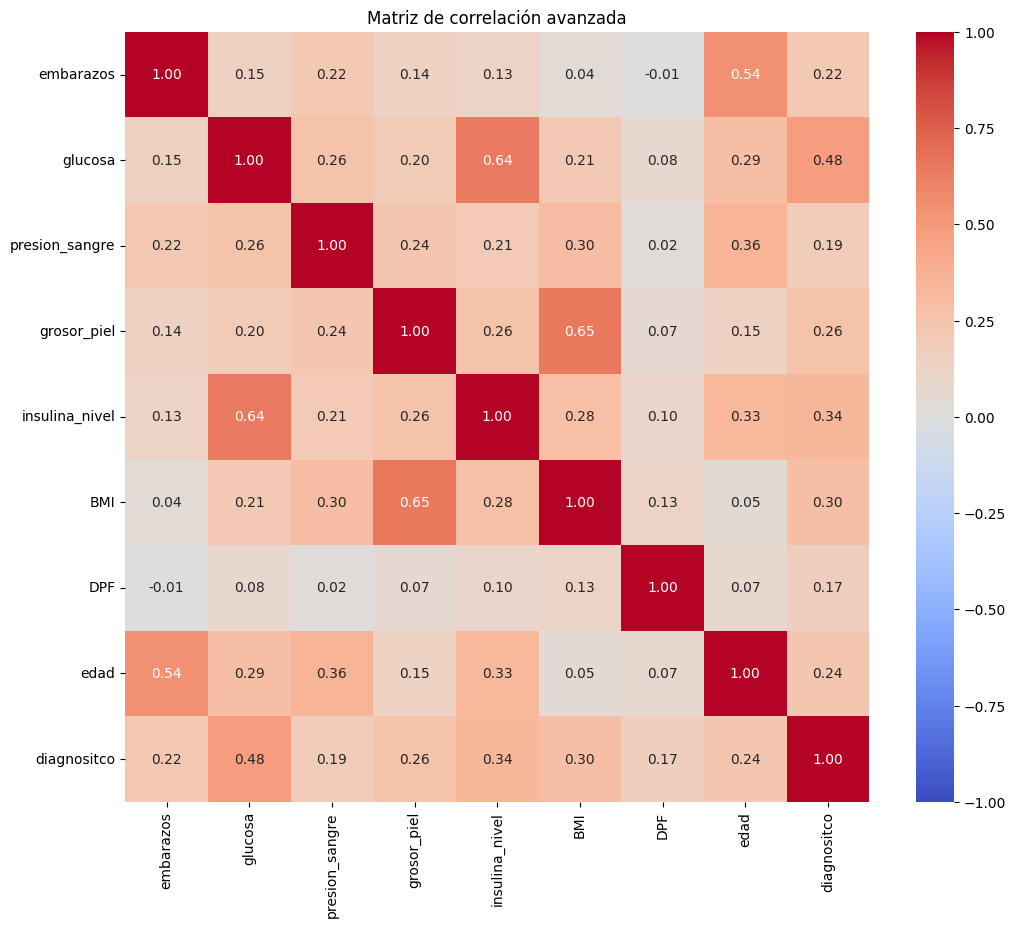

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_clean.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación avanzada')
plt.show()

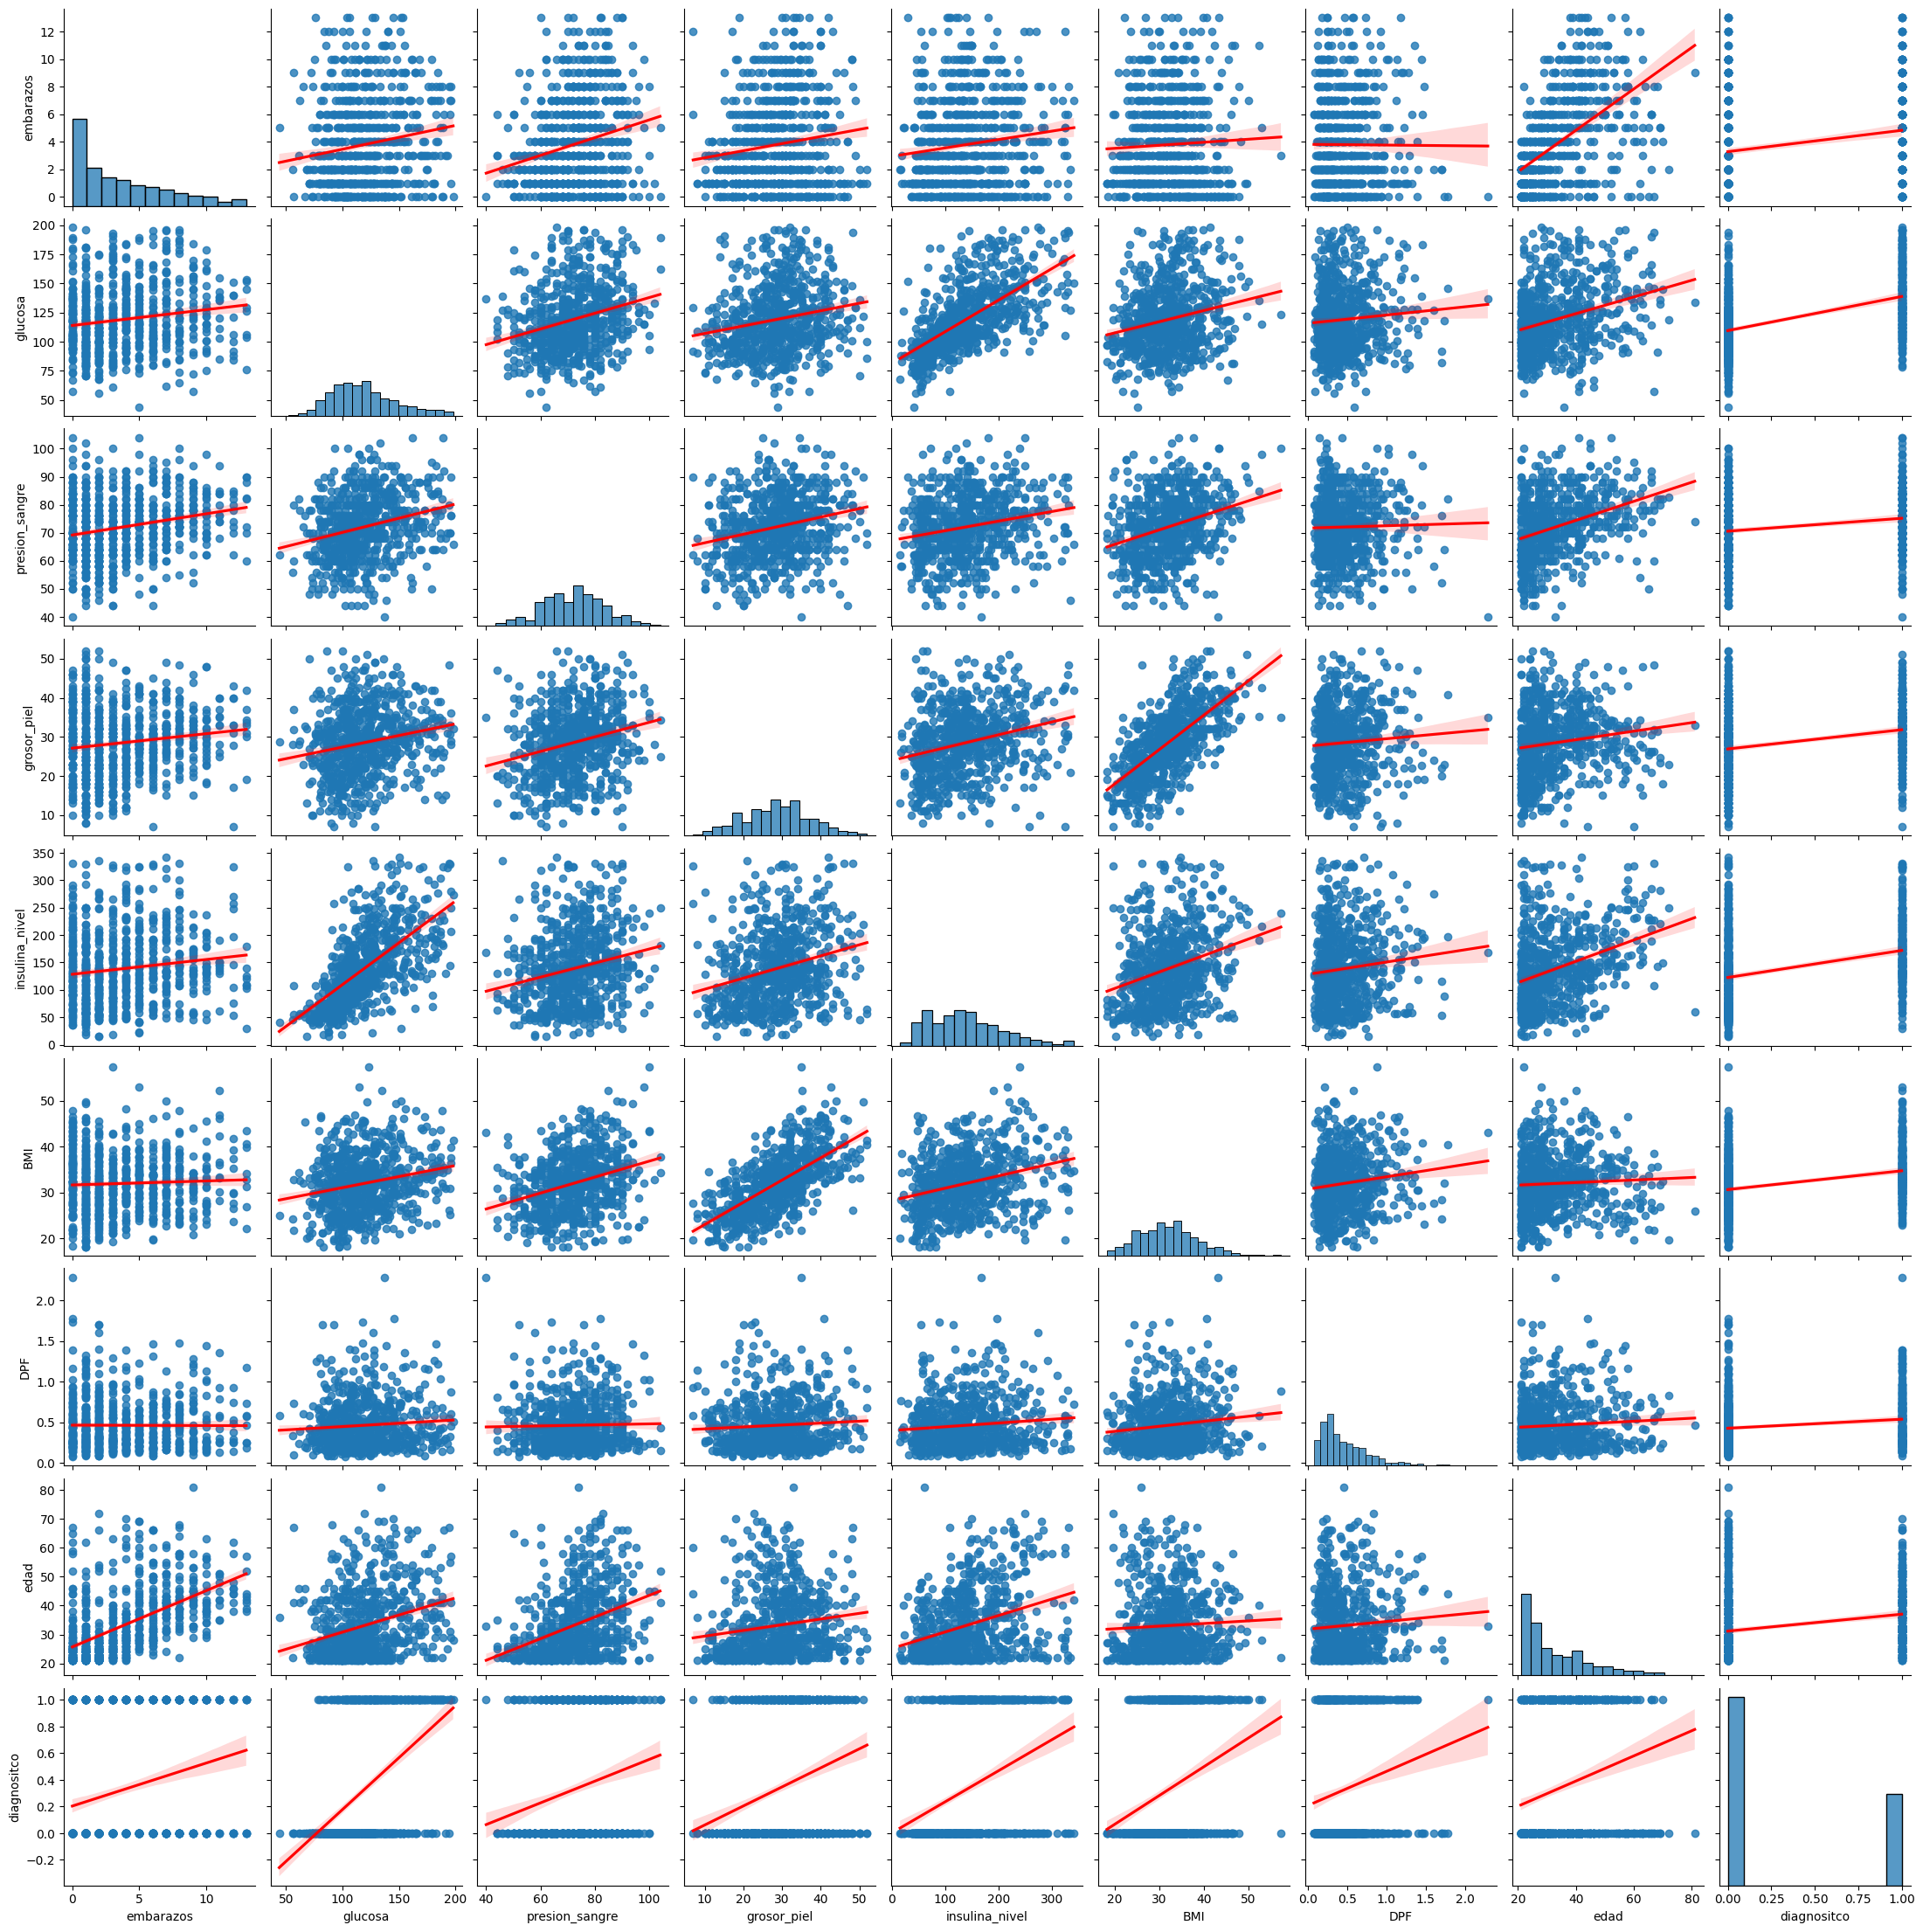

In [34]:
sns.pairplot(data_clean, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()


In [37]:
from sklearn.model_selection import train_test_split

X = data_clean.drop('diagnositco', axis=1)
y = data_clean['diagnositco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Finalmente guardamos nuestros datos y damos por concluido el EDA

In [38]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [39]:
processed_path_train = fr"C:\Users\wipip\OneDrive\Documentos\GitHub\Decision_tree_project-main\data\processed\data_train.csv"
processed_path_test = fr"C:\Users\wipip\OneDrive\Documentos\GitHub\Decision_tree_project-main\data\processed\data_test.csv"

data_train.to_csv(processed_path_train, index=False)
data_test.to_csv(processed_path_test, index=False)